# Title : Comparative Analysis of Deep Learning–Based Semantic Segmentation Models for Water Body Extraction from Remote Sensing Imagery

# Importing Libraries

In [1]:
# I imported the OS module to handle file paths and directory operations
import os

# I imported NumPy to perform numerical computations and array manipulations
import numpy as np

# I imported Matplotlib to visualize images, graphs, and model performance plots
import matplotlib.pyplot as plt

# I imported Seaborn to create enhanced statistical visualizations such as heatmaps and distributions
import seaborn as sns

# I imported TensorFlow to build, train, and evaluate the deep learning model
import tensorflow as tf

# I imported train_test_split to divide the dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# I imported image loading utilities to read and convert images into arrays for model input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# I imported ImageDataGenerator to perform real-time data augmentation during model training
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# I imported kagglehub to download and access datasets directly from Kaggle within the notebook
import kagglehub

# Downloading the dataset

In [2]:
# I downloaded the water body satellite image dataset directly from Kaggle using kagglehub
path = kagglehub.dataset_download(
    "franciscoescobar/satellite-images-of-water-bodies"
)

# I printed the local directory path to confirm where the dataset was stored
print("Dataset downloaded to:", path)

100%|██████████| 247M/247M [00:12<00:00, 20.9MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/franciscoescobar/satellite-images-of-water-bodies/versions/2


# Loading the dataset

In [3]:
# I defined the dataset directory paths for images and corresponding segmentation masks
image_folder = f"{path}/Water Bodies Dataset/Images"
mask_folder  = f"{path}/Water Bodies Dataset/Masks"

# I created a function to load images and masks from the dataset folders and resize them
def load_images_from_folder(img_folder, mask_folder, img_size=(256, 256)):
    images, masks = [], []

    # I iterated through each image filename in the dataset
    for filename in os.listdir(img_folder):
        img_path  = os.path.join(img_folder, filename)
        mask_path = os.path.join(mask_folder, filename)

        # I ensured both image and corresponding mask existed before processing
        if os.path.exists(img_path) and os.path.exists(mask_path):

            # I loaded and resized the RGB satellite image
            img  = load_img(img_path,  target_size=img_size)

            # I loaded and resized the mask image in grayscale format
            mask = load_img(mask_path, target_size=img_size, color_mode="grayscale")

            # I converted images to arrays and normalized pixel values between 0 and 1
            img  = img_to_array(img) / 255.0
            mask = img_to_array(mask) / 255.0

            # I converted the mask into binary format (water = 1, background = 0)
            mask = (mask > 0.5).astype(np.float32)

            # I appended processed image and mask to their respective lists
            images.append(img)
            masks.append(mask)

    # I converted the lists into NumPy arrays for model training
    return np.array(images), np.array(masks)

# I loaded the full dataset using the defined function
X, y = load_images_from_folder(image_folder, mask_folder)

# I printed dataset shapes to verify successful loading and preprocessing
print("Images shape:", X.shape)
print("Masks shape:", y.shape)

Images shape: (2841, 256, 256, 3)
Masks shape: (2841, 256, 256, 1)


# Exploratory Data Analysis

Number of images: 2841
Image shape: (256, 256, 3)
Mask shape: (256, 256, 1)
Unique mask values: [0. 1.]


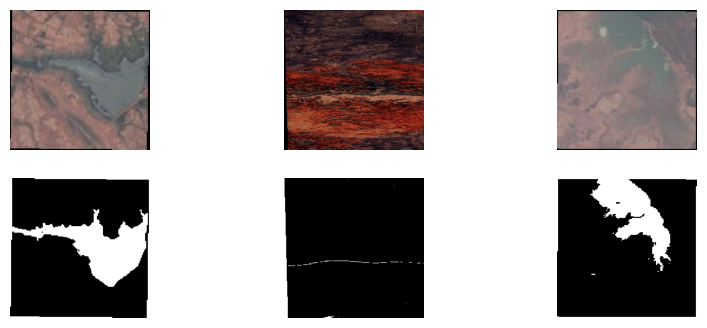

In [4]:
# I printed the total number of images available in the dataset
print("Number of images:", X.shape[0])

# I displayed the shape of each image (height, width, channels)
print("Image shape:", X.shape[1:])

# I displayed the shape of each segmentation mask
print("Mask shape:", y.shape[1:])

# I checked the unique values in masks to confirm they were binary (0 and 1)
print("Unique mask values:", np.unique(y))

# I created a figure to visualize sample images and their corresponding masks
plt.figure(figsize=(10,4))

# I plotted the first three images along with their masks
for i in range(3):

    # I displayed the original satellite image
    plt.subplot(2,3,i+1)
    plt.imshow(X[i])
    plt.axis("off")

    # I displayed the corresponding ground truth mask in grayscale
    plt.subplot(2,3,i+4)
    plt.imshow(y[i].squeeze(), cmap="gray")
    plt.axis("off")

# I rendered the visualization
plt.show()